In [1]:
using PyPlot

### Demonstration of the usefulness of subsampling.

Let's consider a setting in which we are using 0-1 loss for our empirical risk, and imagine that our error rate is $p = 0.3$ over the whole dataset of $n = 10000$ examples. Without loss of generality, suppose that the first $30\%$ of the examples are errors and the remainder are not. We can construct the losses of these examples as follows.

In [2]:
n = 10000;
p = 0.3;
L = vcat(ones(Int64(n * p)), zeros(n - Int64(n * p)));

Next, let's sample some variables $Z_k$ which are samples from the empirical risk.

In [3]:
Kmax = 100000;
Z = [rand(L) for k = 1:Kmax];

Next, we compute the partial averages
$$
    S_K = \frac{1}{K} \sum_{k=1}^K Z_k.
$$

In [4]:
S = cumsum(Z) ./ (1:Kmax);

Now we can plot this average and see how it changes as we increase $K$.

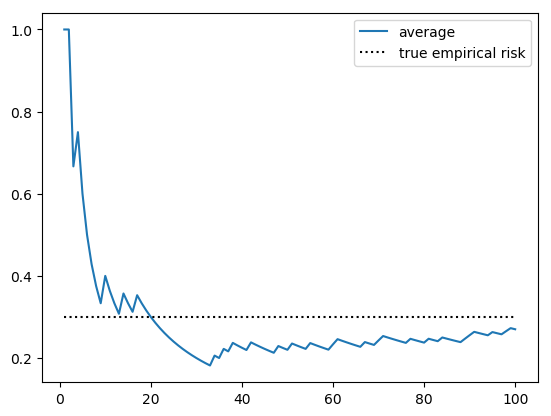

true  empirical  risk: 0.3
approx empirical risk: 0.27
error                : 0.02999999999999997


In [5]:
Kplot = 100;
plot(collect(1:Kplot), S[1:Kplot]; label="average");
plot(collect(1:Kplot), p * ones(Kplot), "k:"; label="true empirical risk");
legend();
show();

# what's the error at the end?
println("true  empirical  risk: $p");
println("approx empirical risk: $(S[Kplot])");
println("error                : $(abs(S[Kplot]-p))");

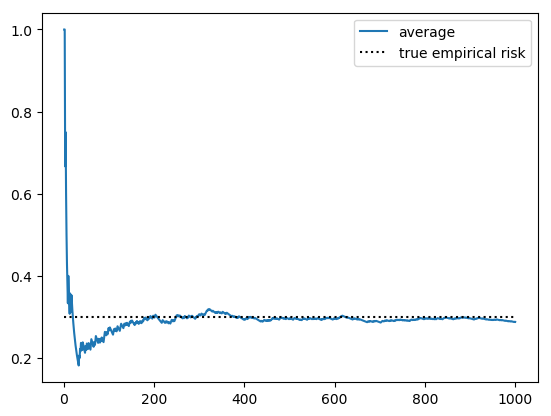

true  empirical  risk: 0.3
approx empirical risk: 0.288
error                : 0.01200000000000001


In [6]:
Kplot = 1000;
plot(collect(1:Kplot), S[1:Kplot]; label="average");
plot(collect(1:Kplot), p * ones(Kplot), "k:"; label="true empirical risk");
legend();
show();

# what's the error at the end?
println("true  empirical  risk: $p");
println("approx empirical risk: $(S[Kplot])");
println("error                : $(abs(S[Kplot]-p))");

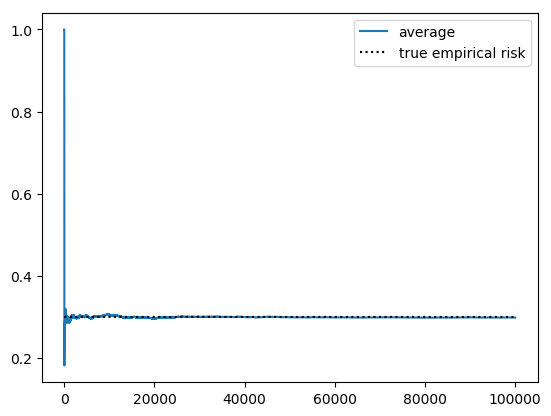

true  empirical  risk: 0.3
approx empirical risk: 0.29847
error                : 0.0015299999999999758


In [7]:
Kplot = Kmax;
plot(collect(1:Kplot), S[1:Kplot]; label="average");
plot(collect(1:Kplot), p * ones(Kplot), "k:"; label="true empirical risk");
legend();
show();

# what's the error at the end?
println("true  empirical  risk: $p");
println("approx empirical risk: $(S[Kplot])");
println("error                : $(abs(S[Kplot]-p))");